In [13]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pyecharts.charts import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sns
import random

In [2]:
df=pd.read_csv('./data/小红书.csv')
df.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


### 去除重复数值和缺失数值

In [3]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.replace('nan',np.nan,inplace=True)
df.fillna(value={'gender':random.choice([1.0,0.0]),'age':round(df['age'].mean(),0),'engaged_last_30':random.choice([1.0,0.0])},inplace=True)
df.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,1.0,60.0,1.0,C,14.90,3498.846,0
4,83.59,1.0,60.0,1.0,C,21.13,3968.490,4


### 简化部分columns命名，方便之后绘图与处理

In [4]:
df=df.rename(columns={'engaged_last_30':'engage',df.keys()[5]:'last_order','previous_order_amount':'accumulation','3rd_party_stores':'3rd'})

In [5]:
df.head()

,revenue,gender,age,engage,lifecycle,last_order,accumulation,3rd
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,1.0,60.0,1.0,C,14.90,3498.846,0
4,83.59,1.0,60.0,1.0,C,21.13,3968.490,4


In [6]:
df.dtypes

revenue         float64
gender          float64
age             float64
engage          float64
lifecycle        object
last_order      float64
accumulation    float64
3rd               int64
dtype: object

In [11]:
columns=df.columns.tolist()

In [12]:
columns

['revenue',
 'gender',
 'age',
 'engage',
 'lifecycle',
 'last_order',
 'accumulation',
 '3rd']

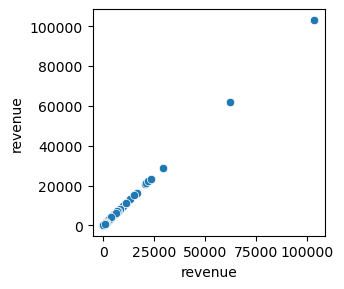

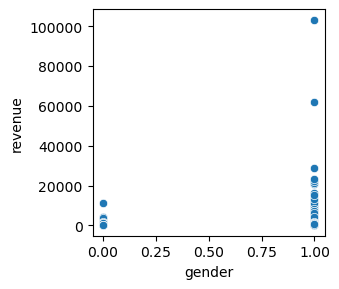

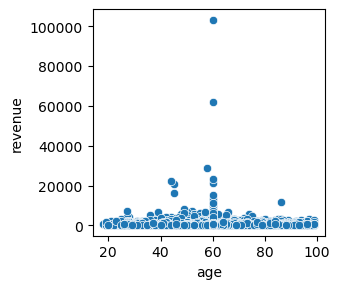

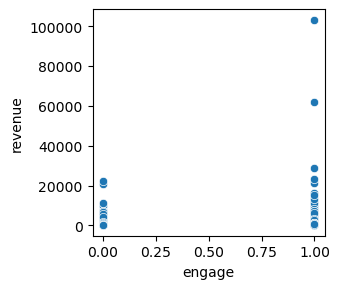

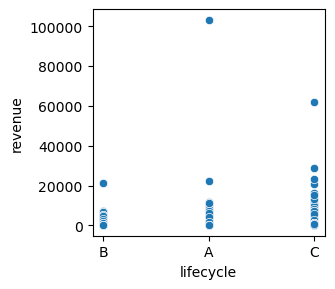

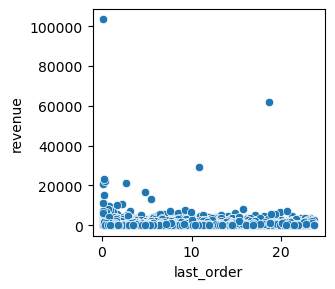

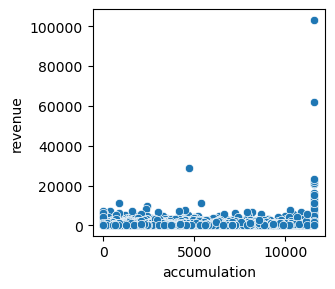

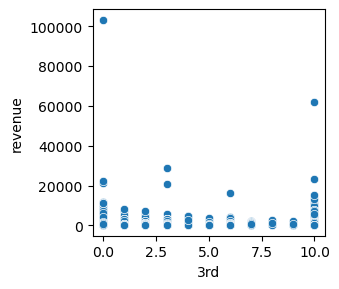

In [15]:
for i in columns:
    plt.figure(figsize=(3,3),dpi=100)
    ax=sns.scatterplot(x=i,y='revenue',data=df)
    

- 绘制每个单一变量和revenue之间的关系

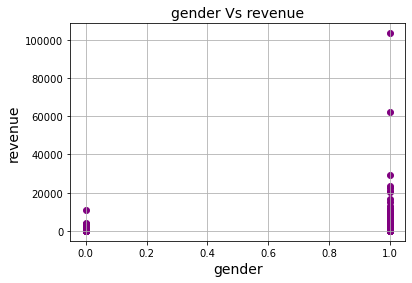

In [17]:
plt.scatter(df['gender'],df['revenue'],color='purple')
plt.title('gender Vs revenue',fontsize=14)
plt.xlabel('gender',fontsize=14)
plt.ylabel('revenue',fontsize=14)
plt.grid(True)
plt.show()

In [21]:
def sca(feature):
    c=random.choice(['purple','lightgreen','orange','pink','lightblue','grey','red'])
    plt.scatter(df[feature],df['revenue'],color=c)
    plt.title('{} Vs revenue'.format(feature),fontsize=14)
    plt.xlabel(feature,fontsize=14)
    plt.ylabel('revenue',fontsize=14)
    plt.grid=True
    plt.show()

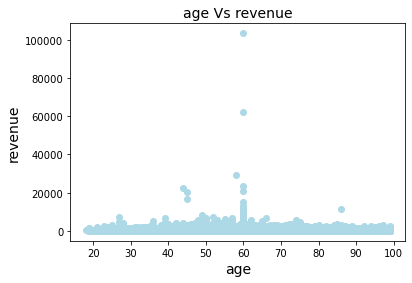

In [22]:
sca('age')

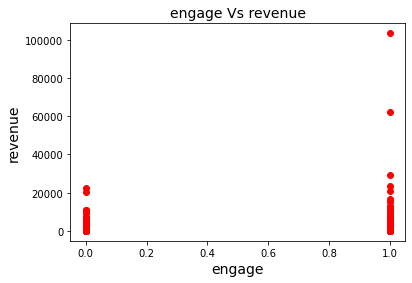

In [23]:
sca('engage')

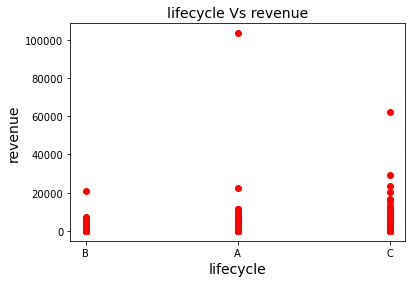

In [24]:
sca('lifecycle')

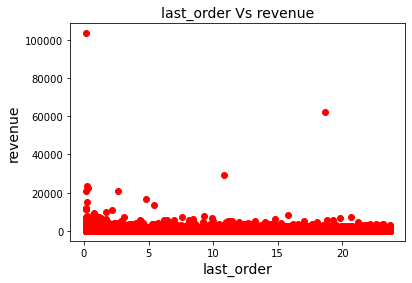

In [25]:
sca('last_order')

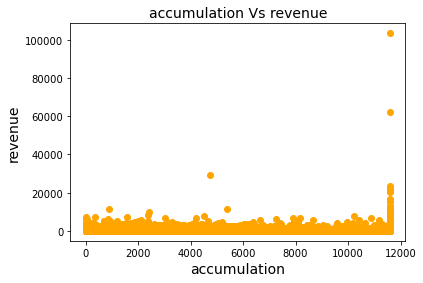

In [26]:
sca('accumulation')

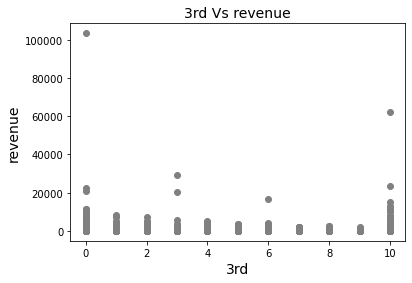

In [27]:
sca('3rd')

#### 可以看出别的列和收入并没有本质上的联系

In [29]:
s=df[df['gender'] == 1.0]
s

,revenue,gender,age,engage,lifecycle,last_order,accumulation,3rd
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,1.0,60.0,1.0,C,14.90,3498.846,0
4,83.59,1.0,60.0,1.0,C,21.13,3968.490,4
...,...,...,...,...,...,...,...,...
29446,43.19,1.0,60.0,1.0,C,0.94,545.180,1
29447,62.97,1.0,53.0,0.0,C,3.45,3738.912,1
29448,87.26,1.0,60.0,1.0,C,10.42,1279.530,0
29449,19.99,1.0,69.0,0.0,C,16.87,669.580,3


In [33]:
males=df[df['gender']==1.0]
females=df[df['gender']==0.0]
plt.figure(figsize=(8,6),dpi=100)
plt.hist(x=males.age,y=males.revenue,color='orange',alpha=0.5)
plt.hist(x=females.age,y=females.revenue,color='bule',alpha=0.5)
plt.legend(labels=['Males','Females'])
plt.show()

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

D:\anacondaStup\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


ValueError: setting an array element with a sequence.

<Figure size 800x600 with 1 Axes>